# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


In [ ]:
#Answer1

In [ ]:
"""
The learning rate in Stochastic Gradient Descent controls the size of the parameter updates,
and therefore plays a crucial role in convergence.
If the learning rate is too large, SGD may overshoot the optimal solution, causing the loss to oscillate or even diverge.
On the other hand, a very small learning rate leads to extremely slow convergence
and may cause the algorithm to get stuck in flat regions of the loss surface.
A well-chosen learning rate allows SGD to converge efficiently while handling the noise introduced by mini-batch updates.
"""

In [ ]:
"""
Some common strategies for choosing or adapting the learning rate during training include using a fixed learning rate
selected through experimentation, often by starting with a small value and increasing it until stable convergence is observed.
Learning rate schedules are also widely used, where the learning rate is gradually reduced over time using step decay,
exponential decay, or time-based decay to ensure stable convergence as the model approaches the optimum.
"""


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df = df.drop(columns=["No", "X1 transaction date"])

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Adding Bias term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [8]:
def batch_gradient_descent(X, y, lr=0.05, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)

    for epoch in range(epochs):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= lr * gradients

    return theta

In [9]:
def stochastic_gradient_descent(X, y, lr=0.01, epochs=50):
    m, n = X.shape
    theta = np.zeros(n)

    for epoch in range(epochs):
        for i in range(m):
            rand_idx = np.random.randint(m)
            xi = X[rand_idx:rand_idx+1]
            yi = y[rand_idx]
            gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradient.flatten()

    return theta

In [10]:
gd_lr = 0.05
gd_epochs = 1000

sgd_lr = 0.01
sgd_epochs = 50

In [11]:
theta_gd = batch_gradient_descent(X_train_b, y_train, gd_lr, gd_epochs)
theta_sgd = stochastic_gradient_descent(X_train_b, y_train, sgd_lr, sgd_epochs)

In [12]:
y_pred_gd = X_test_b.dot(theta_gd)
y_pred_sgd = X_test_b.dot(theta_sgd)

In [13]:
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("MODEL COMPARISON (GD vs SGD)")
print("-" * 40)
print(f"Batch GD  -> MSE: {mse_gd:.4f}, R²: {r2_gd:.4f}")
print(f"SGD       -> MSE: {mse_sgd:.4f}, R²: {r2_sgd:.4f}")

MODEL COMPARISON (GD vs SGD)
----------------------------------------
Batch GD  -> MSE: 65.0612, R²: 0.5898
SGD       -> MSE: 72.5449, R²: 0.5426


In [15]:
sgd_configs = [
    (0.1, 20),
    (0.05, 50),
    (0.01, 100),
    (0.005, 150),
    (0.001, 300),
    (0.0005, 500)
]

for lr, epochs in sgd_configs:
    theta_temp = stochastic_gradient_descent(
        X_train_b, y_train, lr=lr, epochs=epochs
    )

    y_temp_pred = X_test_b.dot(theta_temp)
    mse_temp = mean_squared_error(y_test, y_temp_pred)
    r2_temp = r2_score(y_test, y_temp_pred)

    print(f"LR={lr:<7} Epochs={epochs:<4} -> MSE: {mse_temp:.4f}, R²: {r2_temp:.4f}")

LR=0.1     Epochs=20   -> MSE: 65.7774, R²: 0.5853
LR=0.05    Epochs=50   -> MSE: 106.6604, R²: 0.3276
LR=0.01    Epochs=100  -> MSE: 67.4381, R²: 0.5748
LR=0.005   Epochs=150  -> MSE: 68.0708, R²: 0.5709
LR=0.001   Epochs=300  -> MSE: 65.7213, R²: 0.5857
LR=0.0005  Epochs=500  -> MSE: 64.0272, R²: 0.5963


In [16]:
fixed_epochs = 100
learning_rates = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

for lr in learning_rates:
    theta_temp = stochastic_gradient_descent(X_train_b, y_train, lr=lr, epochs=fixed_epochs)
    y_temp_pred = X_test_b.dot(theta_temp)
    mse_temp = mean_squared_error(y_test, y_temp_pred)
    r2_temp = r2_score(y_test, y_temp_pred)
    print(f"LR={lr:<7} Epochs={fixed_epochs} -> MSE: {mse_temp:.4f}, R²: {r2_temp:.4f}")

LR=0.0005  Epochs=100 -> MSE: 67.4881, R²: 0.5745
LR=0.001   Epochs=100 -> MSE: 65.4011, R²: 0.5877
LR=0.005   Epochs=100 -> MSE: 65.6263, R²: 0.5863
LR=0.01    Epochs=100 -> MSE: 69.8735, R²: 0.5595
LR=0.05    Epochs=100 -> MSE: 65.8482, R²: 0.5849
LR=0.1     Epochs=100 -> MSE: 73.2321, R²: 0.5383


In [17]:
fixed_lr = 0.01
epochs_list = [20, 50, 100, 200, 300, 500]

for epochs in epochs_list:
    theta_temp = stochastic_gradient_descent(X_train_b, y_train, lr=fixed_lr, epochs=epochs)
    y_temp_pred = X_test_b.dot(theta_temp)
    mse_temp = mean_squared_error(y_test, y_temp_pred)
    r2_temp = r2_score(y_test, y_temp_pred)
    print(f"LR={fixed_lr} Epochs={epochs:<4} -> MSE: {mse_temp:.4f}, R²: {r2_temp:.4f}")

LR=0.01 Epochs=20   -> MSE: 63.2264, R²: 0.6014
LR=0.01 Epochs=50   -> MSE: 81.1308, R²: 0.4885
LR=0.01 Epochs=100  -> MSE: 73.0465, R²: 0.5395
LR=0.01 Epochs=200  -> MSE: 66.4303, R²: 0.5812
LR=0.01 Epochs=300  -> MSE: 69.1749, R²: 0.5639
LR=0.01 Epochs=500  -> MSE: 68.6346, R²: 0.5673


In [18]:
# SGD behaves erratically because it updates the model using one random sample at a time,
# causing noisy gradient estimates that make the loss fluctuate rather than decrease smoothly.
# Despite this noise, SGD is preferred for very large datasets because each update is fast,
# requires less memory, and can start learning immediately, making it computationally efficient.
# Additionally, the noise can help escape shallow local minima, sometimes improving generalization.

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



In [ ]:
# 3.1 (a)

Decision Tree is a supervised learning algorithm because it learns to map input features to known target labels using labeled data.


In [ ]:
# 3.1 (b)

Entropy is a measure of impurity or disorder in a dataset. In decision trees, it quantifies the uncertainty in predicting the class label of a data point at a node.

In [ ]:
# 3.1 (c)

Reduction in entropy (also called information gain) signifies that the split at a node reduces uncertainty about class labels. A higher reduction means the split better separates the classes.


In [ ]:
# 3.1 (d)

In [ ]:
"""
Entropy of the Root Node

At the root node, there are ten data points. Points 2, 3, 4, 5, and 6 belong to the positive class, while points 1, 7, 8, 9, and 10 belong to the negative class.
The probabilities of each class are:
p_positive = 5/10 = 0.5
p_negative = 5/10 = 0.5

Entropy of the root node:
H_root = - (p_positive * log2(p_positive) + p_negative * log2(p_negative))
H_root = - (0.5 * log2 0.5 + 0.5 * log2 0.5) = 1.00

"""

In [ ]:
"""

Entropy of Child Nodes for Each Allowed Split

Split 1: x <= -2
Left child: point 1 → negative only → H_left = 0
Right child: points 2–10 → positives = 5, negatives = 4
H_right = -(5/9 * log2(5/9) + 4/9 * log2(4/9)) ≈ 0.99
Weighted entropy: H_split = 1/10 * 0 + 9/10 * 0.99 = 0.891
Information gain: IG = H_root - H_split = 1.00 - 0.891 = 0.11

Split 2: x <= 2
Left child: points 3,4,5,6,7,8,9,10 → positives = 4, negatives = 4 → H_left = 1.00
Right child: point 2 → positive only → H_right = 0
Weighted entropy: H_split = 8/10 * 1.00 + 2/10 * 0 = 0.8
Information gain: IG = 1.00 - 0.8 = 0.20

Split 3: y <= 2
Left child: points 1,3,4,5,6 → positives = 4, negatives = 1 → H_left ≈ 0.72
Right child: points 2,7,8,9,10 → positives = 1, negatives = 4 → H_right ≈ 0.72
Weighted entropy: H_split = 5/10 * 0.72 + 5/10 * 0.72 = 0.72
Information gain: IG = 1.00 - 0.72 = 0.28

"""

In [ ]:
"""
Information gains for splits:
x <= -2 → IG = 0.11
x <= 2 → IG = 0.20
y <= 2 → IG = 0.28

The split with maximum information gain is y <= 2. Therefore, the decision stump should split the root node using this question.

"""

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [20]:
iris = load_iris()
X = iris.data
y = iris.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [22]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

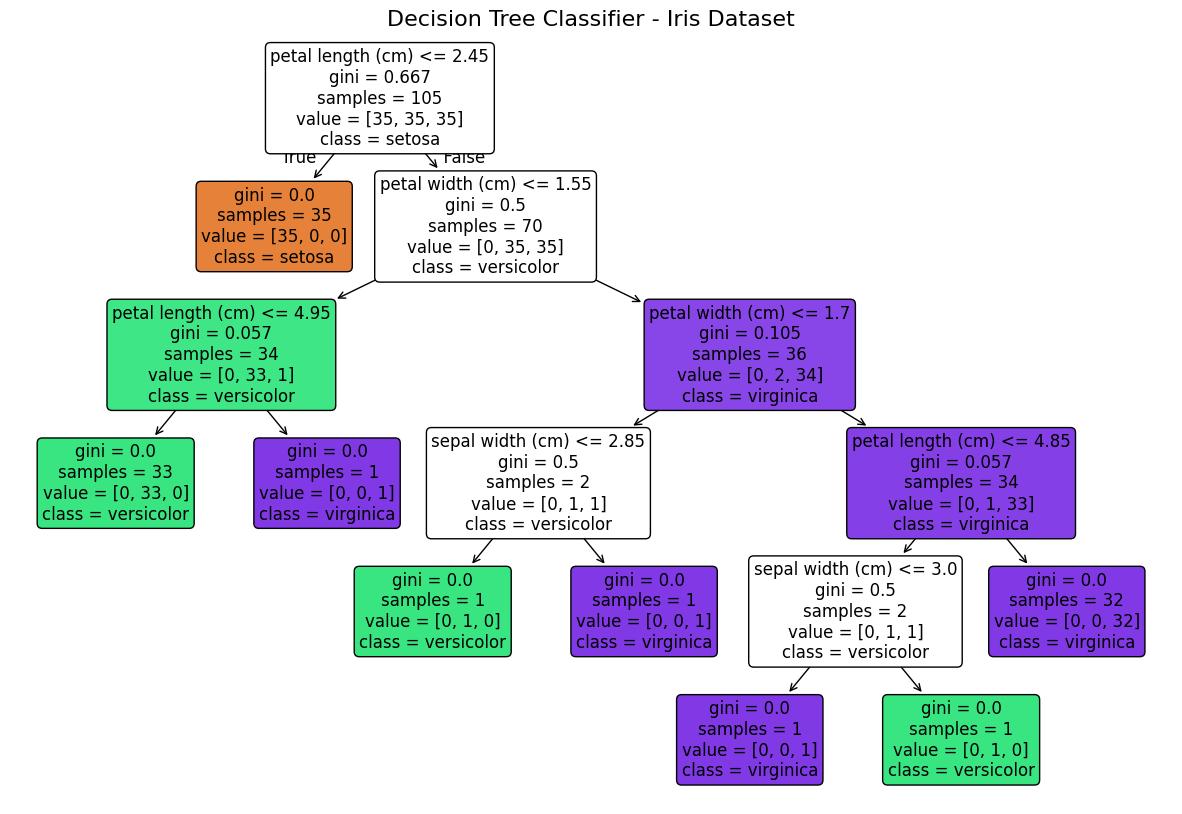

In [23]:
plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Classifier - Iris Dataset", fontsize=16)
plt.show()

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

In [ ]:
""" 4.1 (a) """
# Is SVM supervised or unsupervised?
"""
SVM is a supervised learning algorithm.
It requires labeled data to learn a decision boundary that separates classes.
"""

In [ ]:
""" 4.1 (b) """
# Margin in SVM
"""
The margin is the distance between the decision boundary (hyperplane) and the nearest data points from each class.
SVM aims to maximize the margin to improve generalization and reduce the risk of misclassification.
"""

In [ ]:
""" 4.1 (c) """
# Support vectors
"""
Support vectors are the data points that lie closest to the decision boundary.
They are critical because the position of the hyperplane depends only on them, not on the other points.
"""

In [ ]:
""" 4.1 (d) """
# Purpose of kernel function
"""
A kernel function allows SVM to handle non-linearly separable data by implicitly mapping it to a higher-dimensional space.
Commonly used kernels:
1. Linear kernel
2. Radial Basis Function (RBF) kernel
"""

In [ ]:
""" 4.2 (a) """
# Optimal separating hyperplane for linearly separable data
"""
In a linearly separable dataset, SVM searches for the hyperplane that not only separates the classes but also maximizes the margin,
which is the distance between the hyperplane and the nearest points of each class.
By maximizing the margin, SVM ensures better generalization to unseen data while still correctly classifying all training points.
"""

In [ ]:
""" 4.2 (b) """
# Handling non-linearly separable data
"""
When the data is not linearly separable, a perfect hyperplane cannot separate all points.
SVM handles this by introducing slack variables that allow some points to be misclassified,
and by using kernel functions to transform the data into a higher-dimensional space where it may become linearly separable.
This allows SVM to still find an optimal separating boundary while controlling misclassification.
"""

In [ ]:
""" 4.2 (c) """
# Role of regularization parameter C
"""
The regularization parameter C controls the trade-off between maximizing the margin and minimizing classification errors.
A very large value of C forces the SVM to prioritize classifying all training points correctly,
resulting in a narrower margin and potentially overfitting the training data.
A very small value of C allows more misclassifications, leading to a wider margin and better generalization,
but it may underfit if C is too small.
"""